In [1]:

import numpy as np;
import cv2;
import matplotlib.pyplot as plt;

# Load Image

In [2]:
def read_file(imageName):
    img=cv2.imread(imageName)
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.show()
    return img

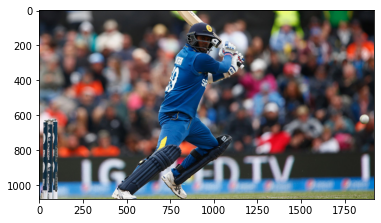

In [3]:
imgName="mathews.jpg"
img=read_file(imgName)

orginal_img= np.copy(img)

# Create edge mask

In [4]:
def edge_mask(img, line_size, blur_value):
    gray=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    gray_blur=cv2.medianBlur(gray,blur_value)

    edges=cv2.adaptiveThreshold(gray_blur,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,line_size,blur_value)
    return edges

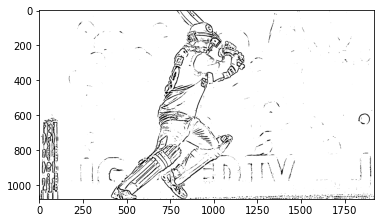

In [5]:
line_size, blur_value= 9,5
edges=edge_mask(img, line_size, blur_value)
plt.imshow(edges,cmap="gray")
plt.show()

# Reduce color palette

In [6]:
def color_quantization(img,k):
    #Transform the image
    data=np.float32(img).reshape((-1,3))

    #Determine criteria
    criteria=(cv2.TermCriteria_EPS+ cv2.TermCriteria_MAX_ITER,20 ,0.001)

    #Implementating K-Means
    ret , label , center = cv2.kmeans(data, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    center = np.uint8(center)

    result = center[label.flatten()]
    result = result.reshape(img.shape)

    return result

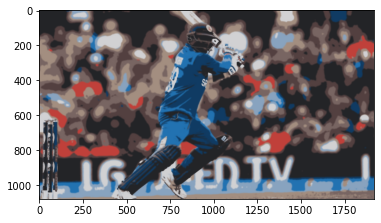

In [7]:
img = color_quantization(img,k=9)

#reduce the noice
blur1 = cv2.bilateralFilter(img,10,200,200)


plt.imshow(blur1)
plt.show()


# combine edge mask and quantize image

In [8]:
def cartoon():
    final_img = cv2.bitwise_and(blur1, blur1, mask=edges)

    plt.imshow(orginal_img)
    plt.show()

    
    plt.imshow(final_img)
    plt.show()

    


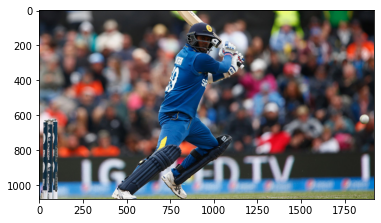

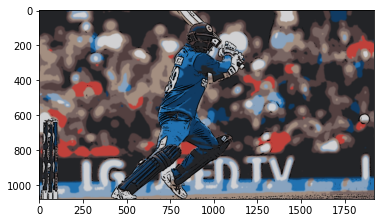

In [9]:
cartoon()